# Градиентный бустинг

## Реализация алгоритма градиентного бустинга для деревьев решений.

Реализация дерева решений в папаке 4_tree, в этой раюоте не буду ее повторять и возьму готовую реализацию дерева решений для регрессии из библиотеки `sklearn`.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

Использую один из "игрушечных" датасетов из той же библиотеки.

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

В качестве функционала ошибки буду использовать среднеквадратичную ошибку

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья буду записывать в список
    trees = []
    
    # Буду записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализирую бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаю на выборке и добавляем в список
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаю на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
import matplotlib.pyplot as plt

In [10]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Обучу несколько моделей с разным количеством деревьев и исследую
их поведение.

In [36]:
#собераю ошибки алгоритма обученного на разыных количествах деревьев в список
errors_by_ntrees = []

# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты (вес) равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = .1


In [37]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    return n_trees, max_depth, mean_squared_error(y_train, train_prediction), mean_squared_error(y_test, test_prediction)

In [38]:
for i in range(1,15):
    n_trees = i
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
#    get_error_plot(n_trees, train_errors, test_errors)
    errors_by_ntrees.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

In [39]:
errors_by_ntrees = np.array(errors_by_ntrees).T
errors_by_ntrees

array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00,
        5.00000000e+00, 6.00000000e+00, 7.00000000e+00, 8.00000000e+00,
        9.00000000e+00, 1.00000000e+01, 1.10000000e+01, 1.20000000e+01,
        1.30000000e+01, 1.40000000e+01],
       [3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        3.00000000e+00, 3.00000000e+00],
       [2.37945511e+04, 1.97732653e+04, 1.65059359e+04, 1.38573536e+04,
        1.16974130e+04, 9.93722648e+03, 8.50540007e+03, 7.32776638e+03,
        6.37266525e+03, 5.58991435e+03, 4.94298972e+03, 4.41583042e+03,
        3.98312244e+03, 3.62954023e+03],
       [2.52875233e+04, 2.13652147e+04, 1.81712097e+04, 1.54753869e+04,
        1.34530158e+04, 1.16818869e+04, 1.03072731e+04, 9.10849474e+03,
        8.14266495e+03, 7.38492293e+03, 6.72840591e+03, 6.22407748e+03,
        5.774

Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.

In [40]:
import matplotlib.pyplot as plt

In [41]:
def get_error_plot(errors_by_ntrees):
    plt.xlabel('ntrees')
    plt.ylabel('MSE')
#    plt.xlim(0, n_trees)
    plt.plot(errors_by_ntrees[0], errors_by_ntrees[2], label='train error')
    plt.plot(errors_by_ntrees[0], errors_by_ntrees[3], label='test error')
    plt.legend(loc='upper right')
    plt.show()

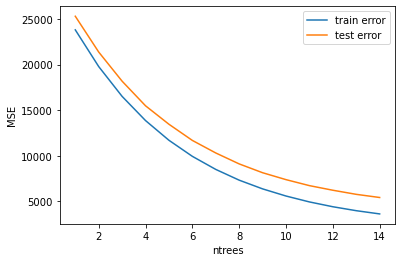

In [42]:
get_error_plot(errors_by_ntrees)

Алгоритм линейно повышает качество на обеих выборках, но на лицо переобучение которое еще и возрастает с услажнением алгоритма.  Переобучение и не может уменьшаться никак потому что модель работает именно последовательно и каждое дерево связанно с предыдущим. ошибка уменишается и градиент становится меньше в итоге переобучение наростает накопительно и не может вдруг на каком-то шаге уменьшится как например в randomforrest где деревья независимы и поправляют друг друга.

увеличим максимальную глубину деревьев

In [21]:
#соберем ошибки алгоритма обученного на разыных максимальных глубин в список
errors_by_maxdepth = []

In [22]:
eta = 0.1
max_depth = 2
n_trees = 20
coefs = [1] * n_trees

for i in range(2,7):
    max_depth = i
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
#   get_error_plot(n_trees, train_errors, test_errors)
    errors_by_maxdepth.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))


In [26]:
errors_by_maxdepth = np.array(errors_by_maxdepth).T
errors_by_maxdepth

array([[2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
        2.00000000e+01],
       [2.00000000e+00, 3.00000000e+00, 4.00000000e+00, 5.00000000e+00,
        6.00000000e+00],
       [2.94426985e+03, 2.43128518e+03, 1.80588085e+03, 1.27963335e+03,
        8.86123744e+02],
       [4.18516287e+03, 4.14080092e+03, 4.31014032e+03, 4.56599940e+03,
        4.70538941e+03]])

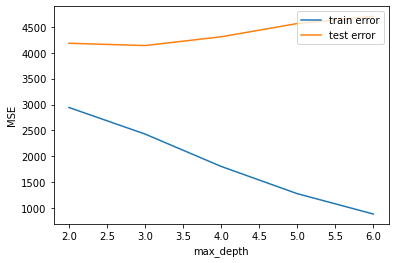

In [27]:
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.plot(errors_by_maxdepth[1], errors_by_maxdepth[2], label='train error')
plt.plot(errors_by_maxdepth[1], errors_by_maxdepth[3], label='test error')
plt.legend(loc='upper right')
plt.show()

Переобучение на лицо опять же, и с усложнением алгоритма за счет увеличения max_depth только растет. Кажется что max_depth=3 оптимальное значение.

Уменьшим шаг обучения 

In [29]:
n_trees = 20 
coefs = [1] * n_trees
max_depth = 3
eta = .01
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [30]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

(20, 3, 20105.636828272876, 21692.71162417982)

In [34]:
n_trees = 20
coefs = [1] * n_trees
max_depth = 3
eta = .008
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [35]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

(20, 3, 21577.644993043774, 23113.765029655944)

В итоге проблема переобучение почти решена, лучшие гиперпарамктры которые получилось подобрать это: 
n_trees = 20 
max_depth = 3
eta = .01